In [1]:
import yt
import numpy as np
import json
from os.path import exists

yt.enable_plugins()

yt : [INFO     ] 2023-02-02 09:23:15,477 Loading plugins from /home/dskinner6/.config/yt/my_plugins.py


In [2]:
run_dir = '../'
data_dir = 'run_data/'
image_outputs = 'images/'

In [3]:
res = 1000
width = (10, 'kpc')

In [4]:
restart_ds = '0037'

In [5]:
limits = False
if limits == True:
    out_dir = "limits"
else:
    out_dir = "no_limits"

In [6]:
with open('massive_prog_info_incl_vir.json') as f:
    massive_prog = json.load(f)

with open('run_halos_incl_vir.json') as f:
    run_halos = json.load(f)
    
with open('param_info.json') as f:
    params = json.load(f)
    
with open('unit_conversion.json') as f:
    unit_convert = json.load(f)

In [7]:
runs = ['run_original', 'run_fiducial', 'run_A', 'run_B', 'run_D', 'run_E']

In [8]:
run_name = 'run_original'
o = '0100'
ds = yt.load(f'../{run_name}/DD{o}/output_{o}')

yt : [INFO     ] 2023-02-02 09:23:19,372 Parameters: current_time              = 71.51416395114
yt : [INFO     ] 2023-02-02 09:23:19,372 Parameters: domain_dimensions         = [64 64 64]
yt : [INFO     ] 2023-02-02 09:23:19,373 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2023-02-02 09:23:19,374 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2023-02-02 09:23:19,374 Parameters: cosmological_simulation   = 1
yt : [INFO     ] 2023-02-02 09:23:19,374 Parameters: current_redshift          = 11.67461985336
yt : [INFO     ] 2023-02-02 09:23:19,374 Parameters: omega_lambda              = 0.6889
yt : [INFO     ] 2023-02-02 09:23:19,375 Parameters: omega_matter              = 0.3111
yt : [INFO     ] 2023-02-02 09:23:19,375 Parameters: omega_radiation           = 0
yt : [INFO     ] 2023-02-02 09:23:19,375 Parameters: hubble_constant           = 0.6766


In [9]:
## Function for creating a list of datasets 

def data_list():
    """
    Returns a yt.DatasetSeries for the runs. 
    This is the same structure used for finding the halo positions.
    """
    dataset_list = []

    for i, run_name in enumerate(runs):
        if run_name == 'run_original':
            for j, o in enumerate(massive_prog):
                if int(o) > int(restart_ds):
                    pass
                else:
                    dataset_list.append(f'{run_dir}{run_name}/DD{o}/output_{o}')
            for j, o in enumerate(run_halos[run_name]):
                if int(o) >= int(restart_ds):
                    dataset_list.append(f'{run_dir}{run_name}/DD{o}/output_{o}')
                else:
                    pass
        else:
            for j, o in enumerate(run_halos[run_name]):
                dataset_list.append(f'{run_dir}{run_name}/DD{o}/output_{o}')

    fns = yt.DatasetSeries(dataset_list)
    
    return fns
    

In [144]:
def data_list_noyt():
    """
    Returns a yt.DatasetSeries for the runs. 
    This is the same structure used for finding the halo positions.
    """
    dataset_list = []

    for i, run_name in enumerate(runs):
        if run_name == 'run_original':
            for j, o in enumerate(massive_prog):
                if int(o) > int(restart_ds):
                    pass
                else:
                    dataset_list.append(f'{run_dir}{run_name}/DD{o}/output_{o}')
            for j, o in enumerate(run_halos[run_name]):
                if int(o) >= int(restart_ds):
                    dataset_list.append(f'{run_dir}{run_name}/DD{o}/output_{o}')
                else:
                    pass
        else:
            for j, o in enumerate(run_halos[run_name]):
                dataset_list.append(f'{run_dir}{run_name}/DD{o}/output_{o}')

    fns = np.array(dataset_list)
    
    return fns

In [10]:
### Function for getting halo information for a given sim 

def get_halo(ds, run_name, o):
    """
    Inputs: ds, run_name, o
    Returns: halo_pos, halo_rvir, halo_mass
    
    This grabs the halo information for the run and output.
    For the original run, we grab the information from massive_prog. After that we grab from run_halos.
    """
    if run_name == 'run_original':
        if int(o) > int(restart_ds):
            halo_pos = ds.arr(run_halos[run_name][o]['position'], 'unitary').to('kpc')
            halo_rvir = ds.quan(run_halos[run_name][o]['rvir'], 'unitary').to('kpc')
            halo_mass = ds.quan(run_halos[run_name][o]['mass'], 'Msun')
        else:
            halo_pos = ds.arr(massive_prog[o]['position'], 'unitary').to('kpc')
            halo_rvir = ds.quan(massive_prog[o]['rvir'], 'unitary').to('kpc')
            halo_mass = ds.quan(massive_prog[o]['mass'], 'Msun')
    else:
        halo_pos = ds.arr(run_halos[run_name][o]['position'], 'unitary').to('kpc')
        halo_rvir = ds.quan(run_halos[run_name][o]['rvir'], 'unitary').to('kpc')
        halo_mass = ds.quan(run_halos[run_name][o]['mass'], 'Msun')
        
    return halo_pos, halo_rvir, halo_mass


In [11]:
units = {("gas", "density"):'g/cm**3', 
         ("gas", "temperature"):'K', 
         ("gas", "cell_mass"):'g', 
         ('gas', 'metallicity'):'Zsun',
         ("gas", "metallicity3"):'Zsun', 
         ("gas", "metallicity4"):"Zr",
         ('gas', 'gas_fraction'):"dimensionless",
         ('gas', 'electron_fraction'):"dimensionless",
         ('gas', 'H2_fraction'):"dimensionless",
         ('gas', 'J21_LW'):"dimensionless", 
         ('gas', 'J_Lyman'):"erg/cm**2",
         ('index', 'radius'):"pc", 
         ('enzo', 'NSMRProcess'):"g/cm**3",
         ('enzo', 'HI_kph'):"1/s", 
         ('enzo', 'HeI_kph'):"1/s", 
         ('enzo', 'HeII_kph'):"1/s"
        }

halo_fields = [('gas', 'metallicity'), 
               ('gas', 'metallicity3'), 
               ('gas', 'gas_fraction'), 
               ('gas', 'temperature'), 
               ('gas', 'electron_fraction'), 
               ('gas', 'H2_fraction'), 
               ('gas', 'density'), 
               ('gas', 'metallicity4'), 
               ('enzo', 'NSMRProcess'),
               ('gas', 'J21_LW'),
               ('gas', 'J_Lyman'),
               ('enzo', 'HI_kph'), 
               ('enzo', 'HeI_kph'), 
               ('enzo', 'HeII_kph')]

halo_weights = [('gas', 'density'), 
                ('gas', 'cell_mass')]

halo_rad_fields = [('gas', 'J21_LW'),
                   ('gas', 'J_Lyman'),
                   ('enzo', 'HI_kph'),
                   ('enzo', 'HeI_kph'),
                   ('enzo', 'HeII_kph')]

In [13]:
## Test data set
run_name = 'run_A'
o = '0100'
ds = yt.load(f'../{run_name}/DD{o}/output_{o}')

halo_pos, halo_rvir, halo_mass = get_halo(ds, run_name, o)
sp = ds.sphere(halo_pos, halo_rvir)

yt : [INFO     ] 2023-02-02 09:23:30,612 Parameters: current_time              = 88.44306507624
yt : [INFO     ] 2023-02-02 09:23:30,612 Parameters: domain_dimensions         = [64 64 64]
yt : [INFO     ] 2023-02-02 09:23:30,613 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2023-02-02 09:23:30,614 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2023-02-02 09:23:30,614 Parameters: cosmological_simulation   = 1
yt : [INFO     ] 2023-02-02 09:23:30,614 Parameters: current_redshift          = 10
yt : [INFO     ] 2023-02-02 09:23:30,614 Parameters: omega_lambda              = 0.6889
yt : [INFO     ] 2023-02-02 09:23:30,615 Parameters: omega_matter              = 0.3111
yt : [INFO     ] 2023-02-02 09:23:30,615 Parameters: omega_radiation           = 0
yt : [INFO     ] 2023-02-02 09:23:30,615 Parameters: hubble_constant           = 0.6766
Parsing Hierarchy : 100%|███████████████████████████████████████████████████████████████████████████████| 1098/109

In [14]:
### Function for getting halo information for a given sim without loading in the dataset

def get_halo_nods(run_name, o):
    """
    Inputs: ds, run_name, o
    Returns: halo_pos, halo_rvir, halo_mass
    
    This grabs the halo information for the run and output.
    For the original run, we grab the information from massive_prog. After that we grab from run_halos.
    """
    if run_name == 'run_original':
        if int(o) > int(restart_ds):
            halo_pos = np.array(run_halos[run_name][o]['position']) * unit_convert[run_name][o]['length']
            halo_rvir = np.array(run_halos[run_name][o]['rvir']) * unit_convert[run_name][o]['length']
            halo_mass = run_halos[run_name][o]['mass']
        else:
            halo_pos = np.array(massive_prog[o]['position']) * unit_convert[run_name][o]['length']
            halo_rvir = np.array(massive_prog[o]['rvir']) * unit_convert[run_name][o]['length']
            halo_mass = massive_prog[o]['mass']
    else:
        halo_pos = np.array(run_halos[run_name][o]['position']) * unit_convert[run_name][o]['length']
        halo_rvir = np.array(run_halos[run_name][o]['rvir']) * unit_convert[run_name][o]['length']
        halo_mass = run_halos[run_name][o]['mass']
        
    return halo_pos, halo_rvir, halo_mass


In [15]:
### Function for getting weighted average halo information given a list of fields and weights

def get_halo_info(ds, sp, fields, weights, units):
    '''
    Input: sp (yt data object), fields (list of fields -- nonradiative), weights (list of weight fields), units (dictionary of units).
    Returns: a dictionary with structure dictionary[field][weight] = value
    '''
    halo_info = {}
    for field in fields:
        ## Check if field exists
        field_lives = field in ds.derived_field_list
        rad_field = field in halo_rad_fields
        
        halo_info[field[1]] = {}
        if field_lives == True:
            if rad_field == True:
                value = sp.quantities.weighted_average_quantity(field, weight=('index', 'ones')).to(units[field]).v.tolist()
                halo_info[field[1]]['ones'] = value
            
            else:
                for weight in weights:
                    value = sp.quantities.weighted_average_quantity(field, weight=weight).to(units[field]).v.tolist()

                    halo_info[field[1]][weight[1]] = value
        else:
            if rad_field == True:
                halo_info[field[1]]['ones'] = -1
            else:
                for weight in weights:
                    halo_info[field[1]][weight[1]] = -1
    
    return halo_info
    

In [16]:
total_fields = [('gas', 'metallicity4'), 
               ('enzo', 'NSMRProcess')]

In [118]:
### Function for getting total quantities of a field in a halo

def get_total_info(ds, sp, fields, units):
    '''
    Input: sp (yt data object), fields (list of fields), weights (list of weight fields), units (dictionary of units).
    Returns: a dictionary with structure dictionary[field][weight] = value
    '''
    halo_info = {}
    for field in fields:
        ## Check if field exists
        field_lives = field in ds.derived_field_list

        if field_lives == True:
            value = sp.quantities.total_quantity(field).to(units[field]).v.tolist()
            halo_info[field[1]] = value
        
        else:
            halo_info[field[1]] = -1
    
    return halo_info

In [125]:
get_halo_info(sp, halo_fields, halo_weights, units)

/home/dskinner6/software/yt-conda/envs/yt_analysis/lib/python3.10/site-packages/yt/fields/derived_field.py:294: VisibleDeprecationWarning: The "H2_fraction" field is deprecated. Please use "H2_p0_fraction" instead.
Deprecated since v4.0.0. This feature will be removed in v4.1.0
  dd = self._function(self, data)


{'metallicity': {'density': 0.0015092442592495997,
  'cell_mass': 0.0006618492100522493},
 'metallicity3': {'density': 0.001281410532507094,
  'cell_mass': 0.0011320010198040734},
 'gas_fraction': {'density': 0.14180247763253953,
  'cell_mass': 0.1743848310301274},
 'temperature': {'density': 12602.145995954068,
  'cell_mass': 11999.38912686577},
 'electron_fraction': {'density': 0.4767251524533962,
  'cell_mass': 0.49881633276166726},
 'H2_fraction': {'density': 5.656488090534146e-07,
  'cell_mass': 5.082712470811846e-07},
 'density': {'density': 5.827272181162975e-25,
  'cell_mass': 2.318433384413868e-25},
 'metallicity4': {'density': -1, 'cell_mass': -1},
 'NSMRProcess': {'density': -1, 'cell_mass': -1},
 'J21_LW': {'ones': 0.5199849134893508},
 'J_Lyman': {'ones': 6.962195757391225e-23},
 'HI_kph': {'ones': 2.6133075611331556e-12},
 'HeI_kph': {'ones': 2.9203103855783487e-12},
 'HeII_kph': {'ones': 2.629068322300116e-16}}

In [14]:
profile_fields = [('gas', 'metallicity'),
                  ('gas', 'metallicity3'),
                  ('gas', 'gas_fraction'),
                  ('gas', 'temperature'),
                  ('gas', 'electron_fraction'),
                  ('gas', 'H2_fraction'),
                  ('gas', 'density'),
                  ("gas", "metallicity4"),
                  ('enzo', 'NSMRProcess')]

In [135]:
### Function for grabbing profile plot data

def profile_plots(ds, sp, fields):
    for field in fields:
        field_lives = field in ds.derived_field_list
        
        if field_lives == True:
            prof_name = f'{data_dir}profile_{field[1]}_{run_name}_{o}.npy'
            
            if exists(prof_name) == False:
                try:
                    plot = yt.ProfilePlot(sp, "radius", field, weight_field='cell_mass')
                    plot.set_unit("radius", "kpc")
                    profile = plot.profiles[0]

                    with open(f'{data_dir}profile_x_{run_name}_{o}.npy', 'wb') as f:
                        np.save(f, np.array(profile.x))

                    for l, prof_field in enumerate(field):
                        plot.set_unit(prof_field, units[field])
                        with open(f'{data_dir}profile_{field[1]}_{run_name}_{o}.npy', 'wb') as f:
                            np.save(f, profile[field])
                    del plot
                    del profile
                except Exception as e:
                    print(f'{run_name} DD{o}: {str(e)}')
            else:
                print(f'Profile plot {field} already made for {run_name} {o}')
        else:
            print(f'Field {field[1]} doesnt exist for {run_name} {o}.')
    return 

In [138]:
profile_plots(ds, sp, profile_fields)

Profile plot ('gas', 'metallicity') already made for run_original 0100
Profile plot ('gas', 'metallicity3') already made for run_original 0100
Profile plot ('gas', 'gas_fraction') already made for run_original 0100
Profile plot ('gas', 'temperature') already made for run_original 0100
Profile plot ('gas', 'electron_fraction') already made for run_original 0100
Profile plot ('gas', 'H2_fraction') already made for run_original 0100
Profile plot ('gas', 'density') already made for run_original 0100
Field metallicity4 doesnt exist for run_original 0100.
Field NSMRProcess doesnt exist for run_original 0100.


In [15]:
## Phase plot fields for all datasets and for post-NSM
phase_fields = [[("gas", "density"), ("gas", "temperature"), ("gas", "cell_mass")],
                [("gas", "density"), ("gas", "temperature"), ('gas', 'metallicity3')],
                [('index', 'radius'), ('gas', 'metallicity3'), ("gas", "cell_mass")],
                [("gas", "metallicity3"), ("gas", "metallicity4"), ("gas", "cell_mass")], 
                [("gas", "density"), ("gas", "temperature"), ("gas", "metallicity4")], 
                [('index', 'radius'), ('gas', 'metallicity4'), ("gas", "cell_mass")]]

In [69]:
### Function for getting phase plot data 

def phase_plot_data(ds, sp, fields, run_name, o):
    for k, fields in enumerate(phase_fields):
        x = fields[0]
        y = fields[1]
        z = fields[2]

        x_lives = x in ds.derived_field_list
        y_lives = y in ds.derived_field_list
        z_lives = z in ds.derived_field_list

        if (x_lives == True) & (y_lives == True) & (z_lives == True):
            H_name = f'{data_dir}phase_H_{x[1]}_{y[1]}_{z[1]}_{run_name}_{o}.npy'
            yedges_name = f'{data_dir}phase_yedges_{x[1]}_{y[1]}_{z[1]}_{run_name}_{o}.npy'
            xedges_name = f'{data_dir}phase_xedges_{x[1]}_{y[1]}_{z[1]}_{run_name}_{o}.npy'

            if ((exists(H_name) == False) and (exists(yedges_name) == False) and (exists(xedges_name) == False)):
                x_data = sp[x].to(units[x])
                y_data = sp[y].to(units[y])
                z_data = sp[z].to(units[z])

                ## Make sure that there are no zeros in the data. Set any zeros to a tiny number.
                x_zeroes = np.argwhere(np.array(x_data) == 0.0)
                if len(x_zeroes) != 0:
                    for i in x_zeroes:
                        x_data[i] = ds.quan(tiny_number, units[x])

                y_zeroes = np.argwhere(np.array(y_data) == 0.0)
                if len(y_zeroes) != 0:
                    for i in y_zeroes:
                        y_data[i] = ds.quan(tiny_number, units[y])

                z_zeroes = np.argwhere(np.array(z_data) == 0.0)
                if len(z_zeroes) != 0:
                    for i in z_zeroes:
                        z_data[i] = ds.quan(tiny_number, units[z])

                x_bins = np.logspace(np.log10(np.min(x_data)), np.log10(np.max(x_data)), 128)
                y_bins = np.logspace(np.log10(np.min(y_data)), np.log10(np.max(y_data)), 128)

                H, yedges, xedges = np.histogram2d(x_data, y_data, [x_bins, y_bins], weights = z_data)

                with open('run_data/phase_H_' + x[1] + '_' + y[1] + '_' + z[1] + '_'+ run_name + '_' + o + '.npy', 'wb') as f:
                    np.save(f, H)
                with open('run_data/phase_yedges_' + x[1] + '_' + y[1] + '_' + z[1] + '_'+ run_name + '_' + o + '.npy', 'wb') as f:
                    np.save(f, yedges)
                with open('run_data/phase_xedges_' + x[1] + '_' + y[1] + '_' + z[1] + '_'+ run_name + '_' + o + '.npy', 'wb') as f:
                    np.save(f, xedges)

                del x
                del y
                del z
                del x_data
                del y_data
                del z_data
                del x_bins
                del y_bins
                del H
                del yedges
                del xedges
            else:
                print(f'{x[1]}_{y[1]}_{z[1]}_{run_name}_{o} created.')
        else:
            field_truth = np.array([x_lives, y_lives, z_lives])
            
            false = field_truth == False
            for i, f in enumerate(false):
                if f == True:
                    print(f'{run_name} {o} field {fields[i]} doesnt exist')
            print('\n')
            
            

In [74]:
phase_plot_data(ds, sp, phase_fields, run_name, o)

density_temperature_cell_mass_run_A_0100 created.
density_temperature_metallicity3_run_A_0100 created.
radius_metallicity3_cell_mass_run_A_0100 created.
metallicity3_metallicity4_cell_mass_run_A_0100 created.
density_temperature_metallicity4_run_A_0100 created.
radius_metallicity4_cell_mass_run_A_0100 created.


In [16]:
proj_fields = [("gas", "density"),
          ('gas', 'temperature'),
          ('gas', 'metallicity'),
          ('gas', 'metallicity3'),
          ('gas', 'metallicity4')]


In [80]:
### Function for getting projection plots

def projection_plot_data(ds, reg, center, fields, run_name, o, width = (10, 'kpc'), res = 1000):
    for field in fields:
        field_exists = field in ds.derived_field_list
        if field_exists == True:
            img_name = f'{data_dir}projection_{field[1]}_{run_name}_{o}.npy'
            if exists(img_name) == False:
                prj = yt.ProjectionPlot(ds, 'x', field, center = halo_pos, weight_field='density', width=width, data_source = reg)
                frb = prj.data_source.to_frb(width, res)
                with open(img_name, 'wb') as f:
                    np.save(f, np.array(frb[field]))
                del prj
                del frb
            else:
                print(f'{img_name} created.')
        else:
            print(f'{run_name} {o} field {field} doesnt exist.')
                
                

In [84]:
projection_plot_data(ds, sp, halo_pos, proj_fields, run_name, o)

run_data/projection_density_run_original_0100.npy created.
run_data/projection_temperature_run_original_0100.npy created.
run_data/projection_metallicity_run_original_0100.npy created.
run_data/projection_metallicity3_run_original_0100.npy created.
run_original 0100 field ('gas', 'metallicity4') doesnt exist.


In [25]:
### Function for getting star information. 
## For any star type, or particular star, grab the information

star_types = ['p2', 'p3'] ## Types of stars (or particles I suppose) to grab information for -- should have been added to dataset already
particular_stars = [0] ## IDs of particular stars to grab information for
star_fields = {'particle_index':'dimensionless',
               'particle_position':'kpc',
               'particle_mass':'Msun',
               'creation_time':'Myr',
               'metallicity_fraction':'Zsun',
               'P2_metallicity_fraction':'Zsun',
               'P3_metallicity_fraction':'Zsun',
               'NSM_metallicity_fraction':'Zr'}

def star_data(ds, ad, fields, star_types, particular_stars = -1):
    star_dict = {}
    for stype in star_types:
        star_dict[stype] = {}
        ## Check to see if there are particles of this type
        num_stars = len(ad[stype, 'particle_index'])
        if num_stars > 0:
            for i, field in enumerate(fields):
                field_exists = (stype, field) in ds.derived_field_list
                
                if field_exists == True:
                    value = ad[stype, field].to(fields[field]).v.tolist()
                    star_dict[stype][field] = value
                else:
                    star_dict[stype][field] = list(np.zeros(num_stars) - 1)
        else:
            star_dict[stype] = -1
    
    if particular_stars != -1:
        star_dict['chosen_stars'] = {}
        for star in particular_stars:
            star_dict['chosen_stars'][str(star)] = {}
            
            part_index = np.argwhere(ad['all', 'particle_index'] == int(star))
            
            if len(part_index) != 0:
                part_type = ad['all', 'particle_type'][part_index[0][0]]
                part_pos = ad['all', 'particle_position'][part_index[0][0]]
                part_mass = ad['all', 'particle_mass'][part_index[0][0]]
                part_ct = ad['all', 'creation_time'][part_index[0][0]]
                
                star_dict['chosen_stars'][str(star)]['position'] = part_pos.to('kpc').v.tolist()
                star_dict['chosen_stars'][str(star)]['mass'] = part_mass.to('Msun').v.tolist()
                star_dict['chosen_stars'][str(star)]['creation_time'] = part_ct.to('Myr').v.tolist()
                star_dict['chosen_stars'][str(star)]['type'] = part_type.v.tolist()
            else:
                star_dict['chosen_stars'][str(star)]['position'] = -1
                star_dict['chosen_stars'][str(star)]['mass'] = -1
                star_dict['chosen_stars'][str(star)]['creation_time'] = -1
                star_dict['chosen_stars'][str(star)]['type'] = -1
                
    return star_dict

In [30]:
ds.add_particle_filter('p2')
ds.add_particle_filter('p3')

ad = ds.all_data()

In [32]:
chosen_star = [params['run_original']['id']]
star_dict = star_data(ds, ad, star_fields, star_types, particular_stars=chosen_star)

In [43]:
### Cleaning up final dictionary in 6_data_grab.py

with open('raw_data_grab.json', 'r') as f:
    raw_data = json.load(f)

In [58]:
halo_quantities_unorder = {}
star_info_unorder = {}

for run_name in runs:
    halo_quantities_unorder[run_name] = {}
    star_info_unorder[run_name] = {}
    
for i, key in enumerate(raw_data):
    key_split = key.split('_')
    run_name = f'{key_split[0]}_{key_split[1]}'
    o = key_split[-1]
    
    halos = raw_data[key][o]['halo_quantities']
    stars = raw_data[key][o]['star_info']
    
    halo_quantities_unorder[run_name][o] = halos
    star_info_unorder[run_name][o] = stars

halo_quantities = {}
star_info = {}
    
for i, key in enumerate(halo_quantities_unorder):
    outputs = np.array(list(halo_quantities_unorder[key].keys()))
    ordered = np.sort(outputs)
    
    halo_quantities[key] = {}
    star_info[key] = {}
    for o in ordered: 
        halo_quantities[key][o] = halo_quantities_unorder[key][o]
            
        star_info[key][o] = star_info_unorder[key][o]


In [70]:
with open('halo_quantities.json', 'w') as f:
    json.dump(halo_quantities, f)
    
with open('star_info.json', 'w') as f:
    json.dump(star_info, f)

In [103]:
star_info[run_name][o]['chosen_stars']

{'738847': {'position': [28.548710132819554,
   30.268738982416618,
   26.89270572327546],
  'mass': 4.8303676570820455,
  'creation_time': 183.1947471272489,
  'type': 1.0}}

In [104]:
star_info_fixed = {}

for i, run_name in enumerate(star_info):
    star_info_fixed[run_name] = {}
    
    for j, o in enumerate(star_info[run_name]):
        star_info_fixed[run_name][o] = {}
        
        star_info_fixed[run_name][o]['p2'] = star_info[run_name][o]['p2']
        star_info_fixed[run_name][o]['p3'] = star_info[run_name][o]['p3']
        
        star_info_fixed[run_name][o]['chosen_stars'] = {}
        for k, name in enumerate(star_info[run_name][o]['chosen_stars']):
            star_info_fixed[run_name][o]['chosen_stars'][name] = {}
            
            star_info_fixed[run_name][o]['chosen_stars'][name]['particle_position'] = star_info[run_name][o]['chosen_stars'][name]['position']
            star_info_fixed[run_name][o]['chosen_stars'][name]['particle_mass'] = star_info[run_name][o]['chosen_stars'][name]['mass']
            star_info_fixed[run_name][o]['chosen_stars'][name]['creation_time'] = star_info[run_name][o]['chosen_stars'][name]['creation_time']
            star_info_fixed[run_name][o]['chosen_stars'][name]['particle_type'] = star_info[run_name][o]['chosen_stars'][name]['type']

In [109]:
with open('star_info_fixed.json', 'w') as f:
    json.dump(star_info_fixed, f)

In [67]:
import functions as f

In [81]:
## Test data set
run_name = 'run_A'
o = '0050'
ds = yt.load(f'../{run_name}/DD{o}/output_{o}')

halo_pos, halo_rvir, halo_mass = get_halo(ds, run_name, o)
sp = ds.sphere(halo_pos, halo_rvir)

yt : [INFO     ] 2023-02-02 10:26:51,324 Parameters: current_time              = 44.673639494287
yt : [INFO     ] 2023-02-02 10:26:51,325 Parameters: domain_dimensions         = [64 64 64]
yt : [INFO     ] 2023-02-02 10:26:51,325 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2023-02-02 10:26:51,326 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2023-02-02 10:26:51,326 Parameters: cosmological_simulation   = 1
yt : [INFO     ] 2023-02-02 10:26:51,327 Parameters: current_redshift          = 16.34578993993
yt : [INFO     ] 2023-02-02 10:26:51,327 Parameters: omega_lambda              = 0.6889
yt : [INFO     ] 2023-02-02 10:26:51,327 Parameters: omega_matter              = 0.3111
yt : [INFO     ] 2023-02-02 10:26:51,328 Parameters: omega_radiation           = 0
yt : [INFO     ] 2023-02-02 10:26:51,328 Parameters: hubble_constant           = 0.6766
Parsing Hierarchy : 100%|████████████████████████████████████████████████████████████████████████████

In [80]:
## Profile plot fields
profile_fields = [('gas', 'metallicity'),
                  ('gas', 'metallicity3'),
                  ('gas', 'gas_fraction'),
                  ('gas', 'temperature'),
                  ('gas', 'electron_fraction'),
                  ('gas', 'H2_fraction'),
                  ('gas', 'density'),
                  ("gas", "metallicity4"),
                  ('enzo', 'NSMRProcess')]

## Phase plot fields
phase_fields = [[("gas", "density"), ("gas", "temperature"), ("gas", "cell_mass")],
                [("gas", "density"), ("gas", "temperature"), ('gas', 'metallicity3')],
                [('index', 'radius'), ('gas', 'metallicity3'), ("gas", "cell_mass")],
                [("gas", "metallicity3"), ("gas", "metallicity4"), ("gas", "cell_mass")], 
                [("gas", "density"), ("gas", "temperature"), ("gas", "metallicity4")], 
                [('index', 'radius'), ('gas', 'metallicity4'), ("gas", "cell_mass")]]

## Projection plot fields
proj_fields = [("gas", "density"),
          ('gas', 'temperature'),
          ('gas', 'metallicity'),
          ('gas', 'metallicity3'),
          ('gas', 'metallicity4')]

In [123]:
field_labels = {"density":r'Density $\left( \frac{g}{cm^{3}} \right)$', 
         "temperature":'Temperature (K)', 
         "cell_mass":'Mass [g]', 
         "metallicity3":r'Pop III Metallicity (Z$_{\odot}$)', 
         "metallicity4":r"NSM R-Process Metallicity (Z$_{r}$)",
         "metallicity":r"Pop II Metallicity (Z$_{\odot}$)",
        'gas_fraction':"Gas Fraction",
         'electron_fraction':"Electron Fraction",
         'H2_fraction':"H2 Fraction",
         'J21_LW':r"J$_{21}$", 
         'J_Lyman':r"J(Lyman) $\left( \frac{erg}{cm^{2}} \right)$",
        'radius':"r (pc)"
        }

colorbars = {"density":'viridis', 
         "temperature":'inferno', 
         "metallicity3":'magma', 
         "metallicity4":'magma',
         "metallicity":'magma'
        }

## Projection limits
zlim = {}
zlim["density"] = (1e-27, 1e-22)
zlim["temperature"] = (1e2, 1e4)
zlim["metallicity"] = (1e-8, 1e-3)
zlim["metallicity3"] = (1e-10, 1e-2)
zlim["metallicity4"] = (1e-3, 1e3)

## Phase plot limits
zlim_phase = {}
zlim_phase["metallicity3"] = (1e-4, 1e-1)
zlim_phase["metallicity4"] = (1e-6, 10)
zlim_phase["cell_mass"] = (1e32, 1e37)

xlim_phase = {}
xlim_phase["density"] = (1e-28, 1e-20)
xlim_phase["metallicity3"] = (1e-10, 1e-1)
xlim_phase['radius'] = (1, 1e3)

ylim_phase = {}
ylim_phase["temperature"] = (10, 1e6)
ylim_phase["metallicity4"] = (1e-10, 1e4)
ylim_phase["metallicity3"] = (1e-10, 1e-1)

## Profile plot limits
xlim_profile = (1e-3, 1)

ylim_profile = {}
ylim_profile["metallicity4"] = (1e-2, 1e3)
ylim_profile['metallicity'] = (1e-6, 1e-2)
ylim_profile['metallicity3'] = (1e-4, 5e1)
ylim_profile['gas_fraction'] = (1e-3, 1)
ylim_profile['temperature'] = (1e2, 1e5)
ylim_profile['electron_fraction'] = (1e-2, 1)
ylim_profile['H2_fraction'] = (1e-7, 1e-2)
ylim_profile['density'] = (1e-26, 1e-20)

In [113]:
### Now going through 7_make_plots to clean this up

## Go through star_info, identify if there are stars to plot

colors = {'p2':'black', 'p3':'red', 'chosen_stars':'white'}

plot_stars = True

star_types = list(star_info_fixed[run_name][o].keys())

for star in star_types:
    star_dict = star_info_fixed[run_name][o][star]
    
    if star_dict != -1:
        if star != 'chosen_stars':
            position = np.array(star_info_fixed[run_name][o][star]['particle_position']) - halo_pos
            pdr = np.sqrt(((position)**2).sum(1))
            ptype = star_info_fixed[run_name][o][star]['particle_type']
            
            new_pos = []
            for dr in pdr:
                if dr < 5:
                    index = np.argwhere(pdr == dr)[0][0]
                    new_pos.append(position[index])

            list_x = [i[1].v for i in new_pos]
            list_y = [i[2].v for i in new_pos]
            
            posx = position[1]
            posy = position[2]
            
            c = colors[star]
            
            plt.scatter(list_x, list_y, marker = '*', color = c, alpha=0.5)
        else:
            for l, part in enumerate(star_info_fixed[run_name][o][star]):
                position = star_info_fixed[run_name][o][star][part]['particle_position'] - halo_pos
                ptype = star_info_fixed[run_name][o][star][part]['particle_type']
                
                posx = position[1]
                posy = position[2]
                
                c = colors[stars]
                
                
                plt.scatter(posx, posy, marker = '*', color = c, alpha=0.5)

In [102]:
star_info[run_name][o]['chosen_stars']

{'738847': {'position': [28.548710132819554,
   30.268738982416618,
   26.89270572327546],
  'mass': 4.8303676570820455,
  'creation_time': 183.1947471272489,
  'type': 1.0}}

In [117]:
## Test data set
run_name = 'run_A'
o = '0050'
ds = yt.load(f'../{run_name}/DD{o}/output_{o}')

halo_pos, halo_rvir, halo_mass = get_halo_nods(run_name, o)

yt : [INFO     ] 2023-02-02 10:59:06,131 Parameters: current_time              = 44.673639494287
yt : [INFO     ] 2023-02-02 10:59:06,131 Parameters: domain_dimensions         = [64 64 64]
yt : [INFO     ] 2023-02-02 10:59:06,132 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2023-02-02 10:59:06,133 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2023-02-02 10:59:06,133 Parameters: cosmological_simulation   = 1
yt : [INFO     ] 2023-02-02 10:59:06,133 Parameters: current_redshift          = 16.34578993993
yt : [INFO     ] 2023-02-02 10:59:06,133 Parameters: omega_lambda              = 0.6889
yt : [INFO     ] 2023-02-02 10:59:06,139 Parameters: omega_matter              = 0.3111
yt : [INFO     ] 2023-02-02 10:59:06,139 Parameters: omega_radiation           = 0
yt : [INFO     ] 2023-02-02 10:59:06,140 Parameters: hubble_constant           = 0.6766


In [134]:
with open('run_DD_data.json') as f:
    DD_data = json.load(f)

time = DD_data[run_name][o]['time']
redshift = DD_data[run_name][o]['redshift']

colors = {'p2':'black', 'p3':'red', 'chosen_stars':'white'}


In [142]:
### Make projections
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from mpl_toolkits.axes_grid1 import make_axes_locatable

font = {'family' : 'serif',
        'weight' : 'normal',
        'size'   : 18}

matplotlib.rc('font', **font)

def make_projections(run_name, o, halo_rvir, time, redshift, fields, field_labels, zlim, colorbars, starcolors, set_limits = False, plot_stars = True):
    for field in fields:
        proj_name = f'{data_dir}projection_{field[1]}_{run_name}_{o}.npy'
        
        if exists(proj_name) == True: ## Data exists
            if set_limits == True:
                proj_img_name = f'{image_outputs}{run_name}/limits/projection_{field[1]}_{o}.png'
            else:
                proj_img_name = f'{image_outputs}{run_name}/no_limits/projection_{field[1]}_{o}.png'
        
            #if exists(proj_img_name) == False: ## Image doesn't exist
            cbar_label =  field_labels[field[1]]
            vmin = zlim[field[1]][0]
            vmax = zlim[field[1]][1]
            cmap = colorbars[field[1]]
            try:
                with open(proj_name, 'rb') as f:
                    frb = np.load(f)
            except Exception as e:
                print(f'ERROR {run_name} {o}: {str(e)}')
                continue

            plot_time_label = 't = ' + str(round(time, 2)) + ' Myr \nz = ' + str(round(redshift, 2))
            bbox = dict(boxstyle='square', fc='white', ec='white', alpha=0.5)
            radius = halo_rvir * 100

            fig = plt.figure(figsize=(10,10))
            ax = plt.subplot()

            if set_limits == True:
                img = ax.imshow(frb, origin="lower",extent=[-5, 5, -5, 5], cmap = cmap, norm=LogNorm(vmin=vmin, vmax=vmax))
            else:
                img = ax.imshow(frb, origin="lower",extent=[-5, 5, -5, 5], cmap = cmap, norm=LogNorm())

            ## See if there are stars to plot

            star_types = list(star_info_fixed[run_name][o].keys())

            for star in star_types:
                star_dict = star_info_fixed[run_name][o][star]

                if star_dict != -1:
                    if star != 'chosen_stars':
                        position = np.array(star_info_fixed[run_name][o][star]['particle_position']) - halo_pos
                        pdr = np.sqrt(((position)**2).sum(1))

                        new_pos = []
                        for dr in pdr:
                            if dr < 5:
                                index = np.argwhere(pdr == dr)[0][0]
                                new_pos.append(position[index])

                        list_x = [i[1] for i in new_pos]
                        list_y = [i[2] for i in new_pos]

                        posx = position[1]
                        posy = position[2]

                        c = starcolors[star]

                        plt.scatter(list_x, list_y, marker = '*', color = c, alpha=0.5)
                    else:
                        for l, part in enumerate(star_info_fixed[run_name][o][star]):
                            position = star_info_fixed[run_name][o][star][part]['particle_position'] - halo_pos
                            ptype = star_info_fixed[run_name][o][star][part]['particle_type']

                            posx = position[1]
                            posy = position[2]
                            
                            c = starcolors[star]

                            plt.scatter(posx, posy, marker = '*', color = c, alpha=1.0)

            plt.plot(0, 0, 'o', ms=radius, mec='white', mfc='none')   
            divider = make_axes_locatable(ax)
            cax = divider.append_axes("right", size="5%", pad=0)
            cbar = plt.colorbar(img, cax = cax)
            cbar.set_label(cbar_label)

            ax.set_xlabel('y (kpc)')
            ax.set_ylabel('z (kpc)')
            ax.text(-4.8, 4.15, plot_time_label, color='black', bbox=bbox)

            fig.tight_layout()
            plt.show()

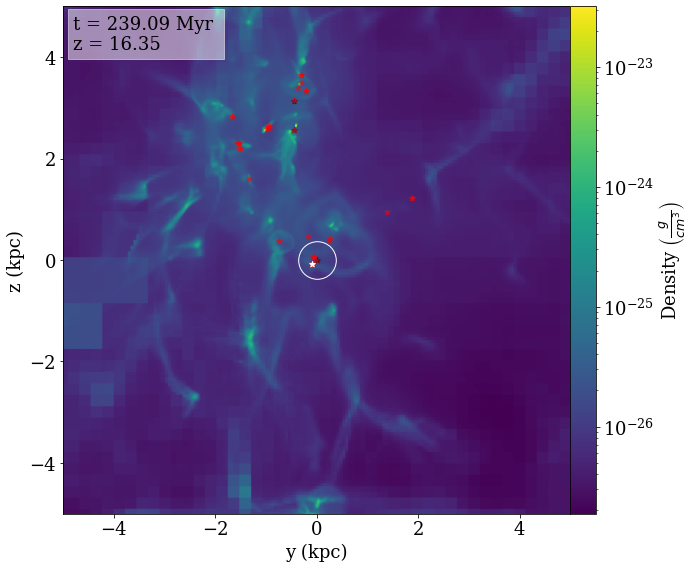

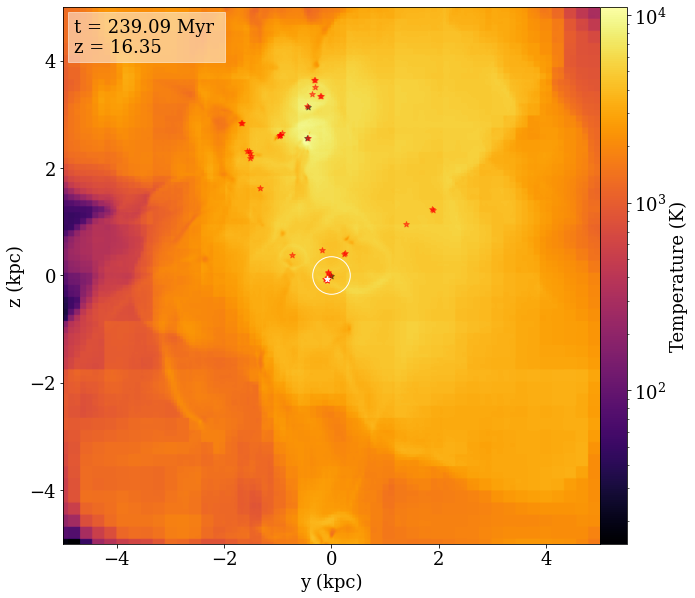

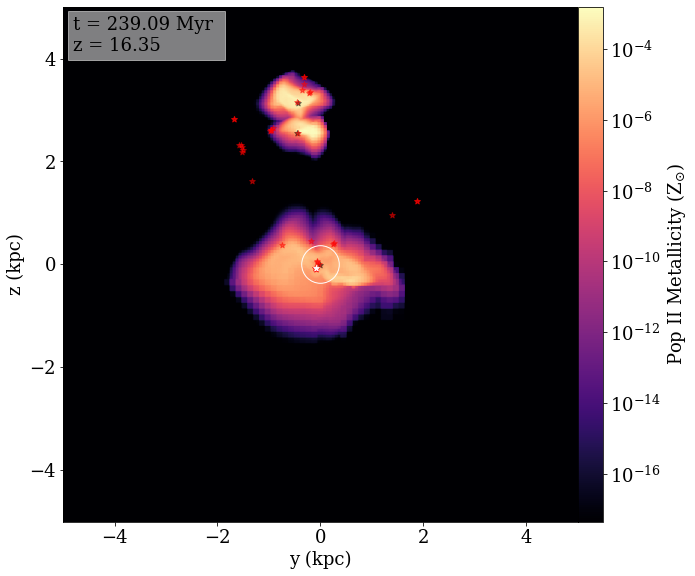

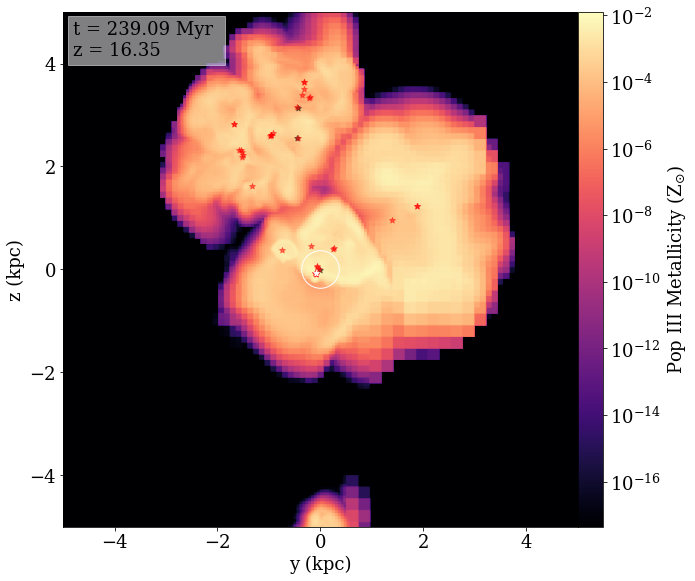

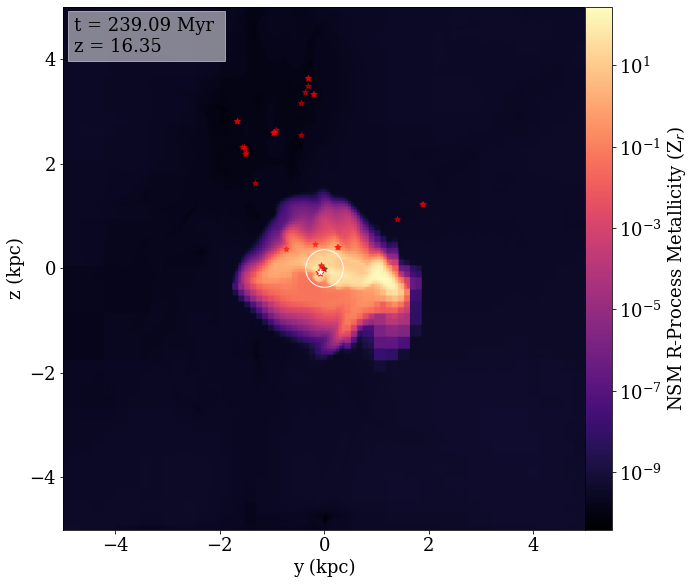

In [143]:
make_projections(halo_rvir, time, redshift, proj_fields, field_labels, zlim, colorbars, colors)

In [158]:
phase_fields = [[("gas", "density"), ("gas", "temperature"), ("gas", "cell_mass")],
                [("gas", "density"), ("gas", "temperature"), ('gas', 'metallicity3')],
                [('index', 'radius'), ('gas', 'metallicity3'), ("gas", "cell_mass")],
                [("gas", "metallicity3"), ("gas", "metallicity4"), ("gas", "cell_mass")], 
                [("gas", "density"), ("gas", "temperature"), ("gas", "metallicity4")], 
                [('index', 'radius'), ('gas', 'metallicity4'), ("gas", "cell_mass")]]

zlim_phase = {}
zlim_phase["metallicity3"] = (1e-4, 1e-1)
zlim_phase["metallicity4"] = (1e-6, 10)
zlim_phase["cell_mass"] = (1e32, 1e37)

xlim_phase = {}
xlim_phase["density"] = (1e-28, 1e-20)
xlim_phase["metallicity3"] = (1e-10, 1e-1)
xlim_phase['radius'] = (1, 1e3)

ylim_phase = {}
ylim_phase["temperature"] = (10, 1e6)
ylim_phase["metallicity4"] = (1e-10, 1e4)
ylim_phase["metallicity3"] = (1e-10, 1e-1)

In [191]:
### Phase plots
stars = ['p3_living', 'p3_binary', 'ns_binary', 'bh', 'p2', 'dm']
types = [5, 12, 13, 6, 7, 1]

def make_phase(run_name, o, time, redshift, fields, field_labels, xlim, ylim, zlim, set_limits = False, chosen_star = -1):
    for k, field in enumerate(fields):
            x_field = field[0]
            y_field = field[1]
            z_field = field[2]

            phase_name = f'{data_dir}phase_xedges_{x_field[1]}_{y_field[1]}_{z_field[1]}_{run_name}_{o}.npy'
            
            if set_limits == True:
                phase_img_name = f'{image_outputs}{run_name}/limits/phase_{x_field[1]}_{y_field[1]}_{z_field[1]}_{run_name}_{o}.png'
            else:
                phase_img_name = f'{image_outputs}{run_name}/no_limits/phase_{x_field[1]}_{y_field[1]}_{z_field[1]}_{run_name}_{o}.png'

            if exists(phase_name) == True: ## See if the data exists
                if exists(phase_img_name) == False: ## See if the image exists
                    try:
                        with open(phase_name, 'rb') as f:
                            xedges = np.load(f)

                        with open(f'{data_dir}phase_yedges_{x_field[1]}_{y_field[1]}_{z_field[1]}_{run_name}_{o}.npy', 'rb') as f:
                            yedges = np.load(f)

                        with open(f'{data_dir}phase_H_{x_field[1]}_{y_field[1]}_{z_field[1]}_{run_name}_{o}.npy', 'rb') as f:
                            H = np.load(f)

                        vmin = zlim[z_field[1]][0]
                        vmax = zlim[z_field[1]][1]

                        X, Y = np.meshgrid(xedges, yedges)

                        plot_time_label = 't = ' + str(round(time, 2)) + ' Myr \nz = ' + str(round(redshift, 2))
                        bbox = dict(boxstyle='square', fc='black', ec='black', alpha=0.5)

                        fig = plt.figure(figsize=(10,10))
                        ax = plt.subplot()

                        if set_limits == True:
                            img = ax.pcolormesh(Y, X, H, norm=LogNorm(vmin = vmin, vmax = vmax))
                            ax.set_xlim(xlim[x_field[1]][0], xlim[x_field[1]][1])
                            ax.set_ylim(ylim[y_field[1]][0], ylim[y_field[1]][1])
                        else:
                            img = ax.pcolormesh(Y, X, H, norm=LogNorm())
                        ax.set_yscale('log')
                        ax.set_xscale('log')
                        divider = make_axes_locatable(ax)
                        cax = divider.append_axes("right", size="5%", pad=0)
                        cbar = plt.colorbar(img, cax = cax)

                        plt.text(0.02, 0.92, plot_time_label, color='white', bbox=bbox, transform=ax.transAxes)
                        ax.set_xlabel(field_labels[x_field[1]])
                        ax.set_ylabel(field_labels[y_field[1]])

                        if chosen_star != -1:
                            star_type = star_info_fixed[run_name][o]['chosen_stars'][chosen_star]['particle_type']
                            type_name = np.array(stars)[np.argwhere(np.array(types) == star_type)[0][0]]

                            ax.set_title(type_name)
                        cbar.set_label(field_labels[z_field[1]])

                        fig.tight_layout()

                        #plt.savefig(phase_img_name, dpi=300)
                        plt.show()

                    except Exception as e:
                        print(f'ERROR {run_name} {o} e: {str(e)}')
                        print(f'x: {x_field}, y {y_field}, z {z_field}')
                else:
                    print(f'{phase_img_name} has been created.')
        

In [187]:
chosen_star = params[run_name]['id']

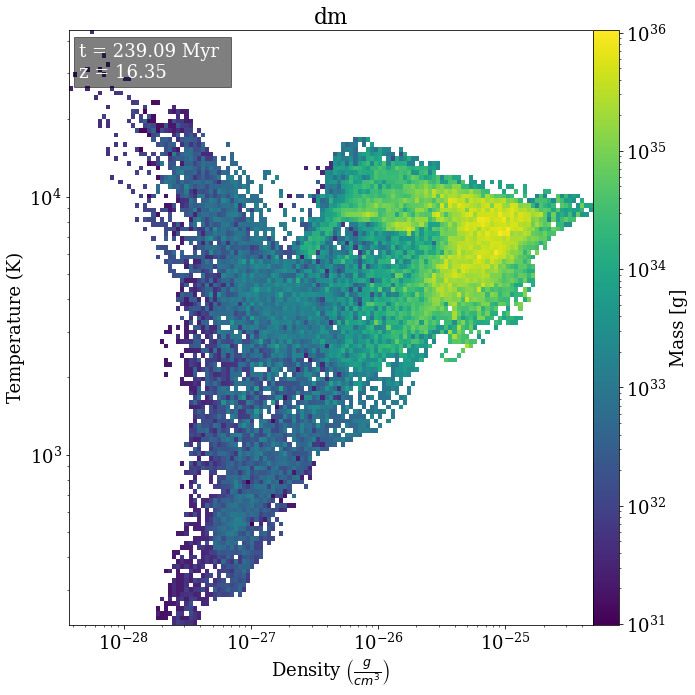

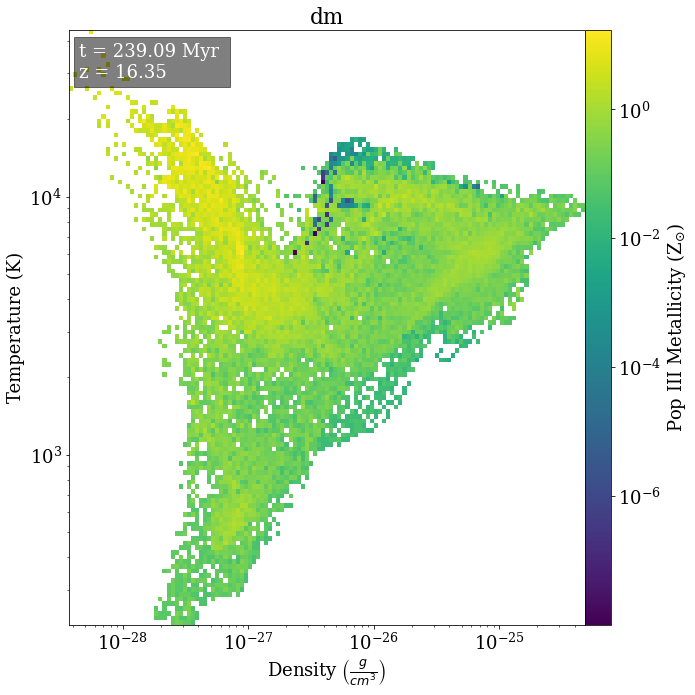

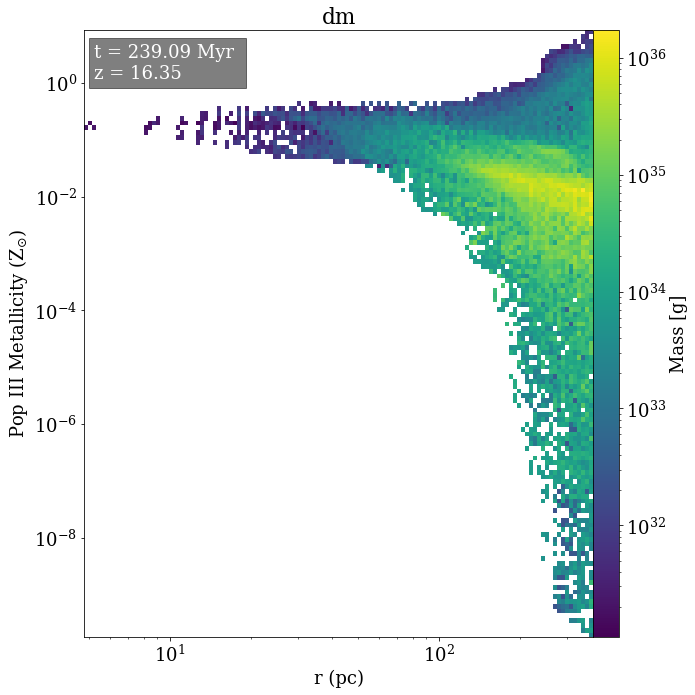

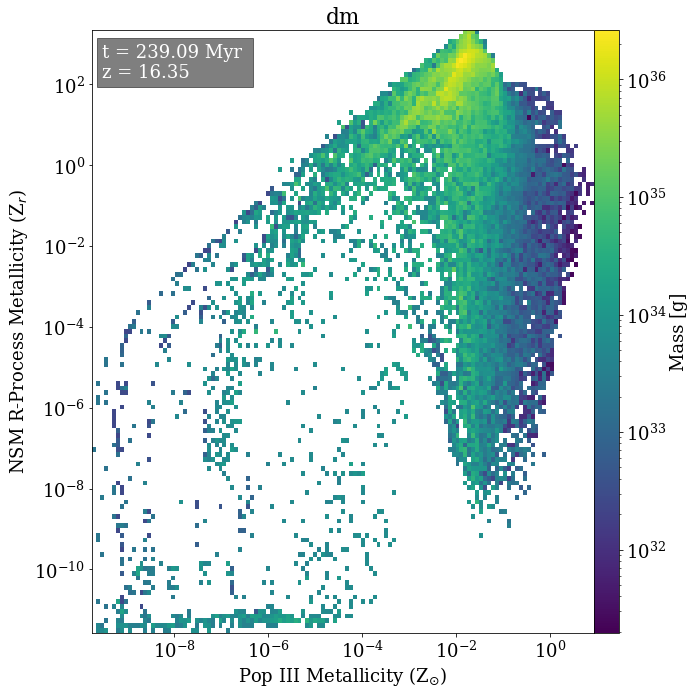

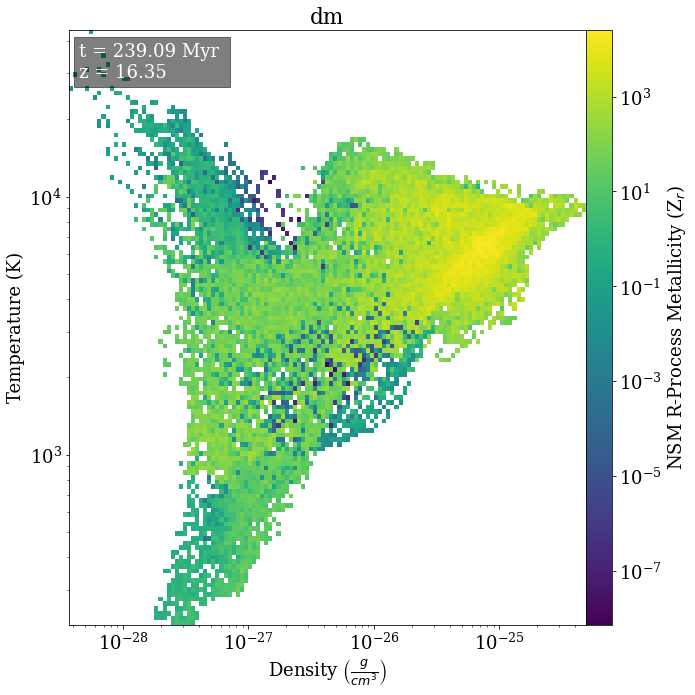

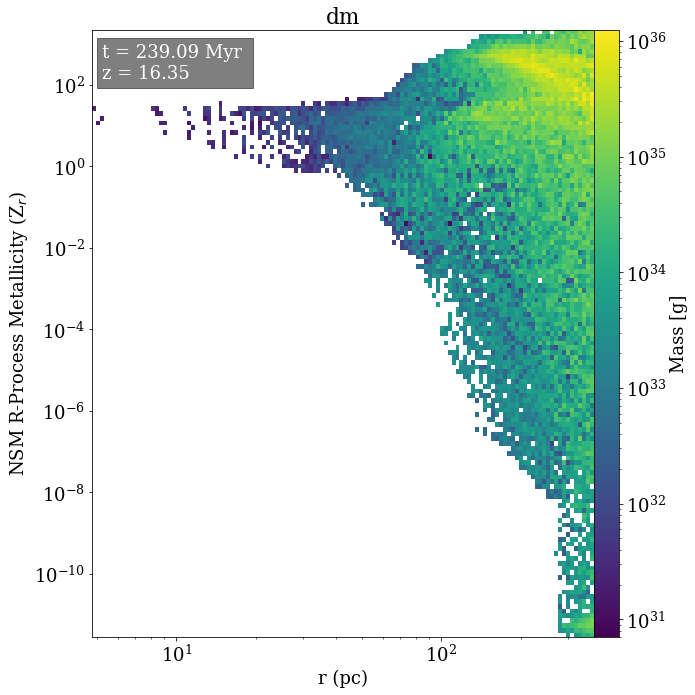

In [192]:
make_phase(run_name, o, time, redshift, phase_fields, field_labels, xlim_phase, ylim_phase, zlim_phase, chosen_star = chosen_star)

In [204]:
### Profile plots
def make_profile(run_name, o, fields, xlim = xlim_profile, ylim = ylim_profile, set_limits = False, chosen_star = -1, halo_pos = -1):
    try:
        profile_x = f'{data_dir}profile_x_{run_name}_{o}.npy'
        with open(profile_x, 'rb') as f:
            xx = np.load(f)

        plot_time_label = 't = ' + str(round(time, 2)) + ' Myr \nz = ' + str(round(redshift, 2))
        bbox = dict(boxstyle='square', fc='grey', ec='black', alpha=0.5)
        for l, field in enumerate(fields):
            profile_y = f'{data_dir}profile_{field[1]}_{run_name}_{o}.npy'

            if set_limits == True: 
                profile_img_name = f'{image_outputs}{run_nam}e/limits/profile_prof_{field[1]}_{run_name}_{o}.png'
            else:
                profile_img_name = f'{image_outputs}{run_name}/no_limits/profile_prof_{field[1]}_{run_name}_{o}.png'

            if exists(profile_y) == True: ## See if the data is there
                if exists(profile_img_name) == False: ## See if the image is there

                    with open(profile_y, 'rb') as f:
                        y = np.load(f)

                    fig = plt.figure(figsize=(10, 8))
                    ax = plt.subplot()

                    plt.loglog(xx, y)

                    if chosen_star != -1:
                        chosen_pos = np.array(star_info_fixed[run_name][o]['chosen_stars'][chosen_star]['particle_position']) - halo_pos
                        chosen_dr = np.sqrt(((chosen_pos)**2).sum())
                        
                        star_type = star_info_fixed[run_name][o]['chosen_stars'][chosen_star]['particle_type']
                        type_name = np.array(stars)[np.argwhere(np.array(types) == star_type)[0][0]]

                        
                        plt.axvline(x = chosen_dr, color='black')
                        plt.title(type_name)
                    plt.xlabel(r'Radius (kpc)')
                    plt.ylabel(field_labels[field[1]])
                    plt.text(0.02, 0.90, plot_time_label, color='black', bbox=bbox, transform=ax.transAxes)

                    if set_limits == True:
                        plt.xlim(xlim[0], xlim[1])
                        plt.ylim(ylim[field[1]][0], ylim[field[1]][1])

                    fig.tight_layout()
                    plt.show()
                    #plt.savefig(profile_img_name, dpi=300)
    except Exception as e:
        print(f'ERROR {run_name} {o} e: {str(e)}')

In [201]:
star_info[run_name][o]['chosen_stars'][chosen_star]

{'position': [28.548710132819554, 30.268738982416618, 26.89270572327546],
 'mass': 4.8303676570820455,
 'creation_time': 183.1947471272489,
 'type': 1.0}

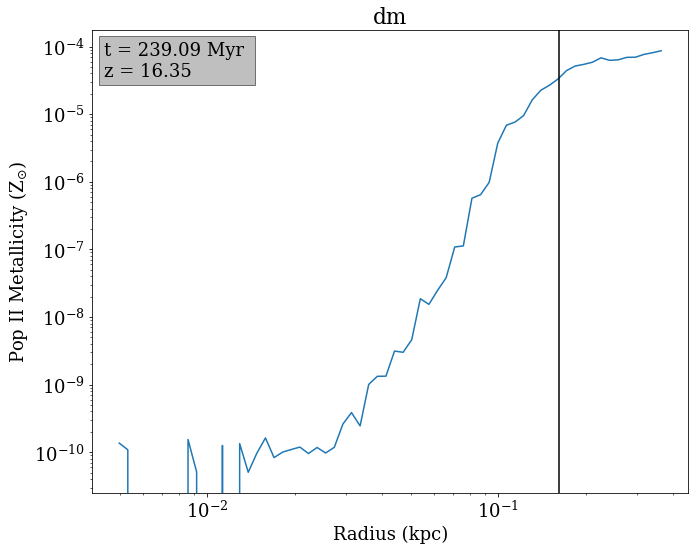

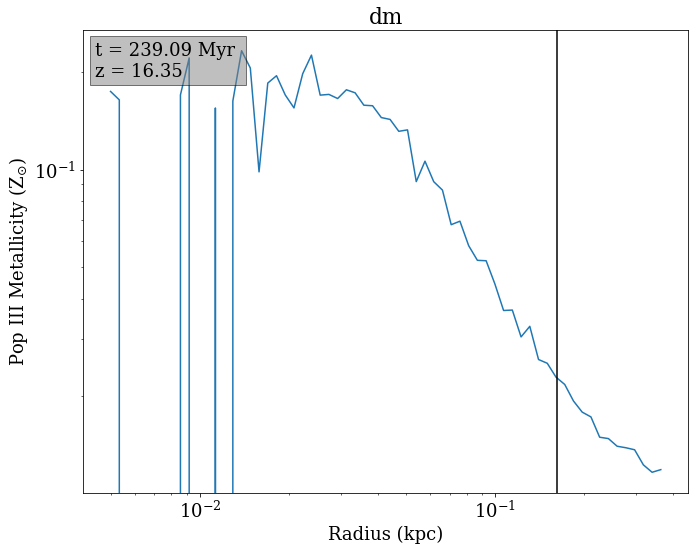

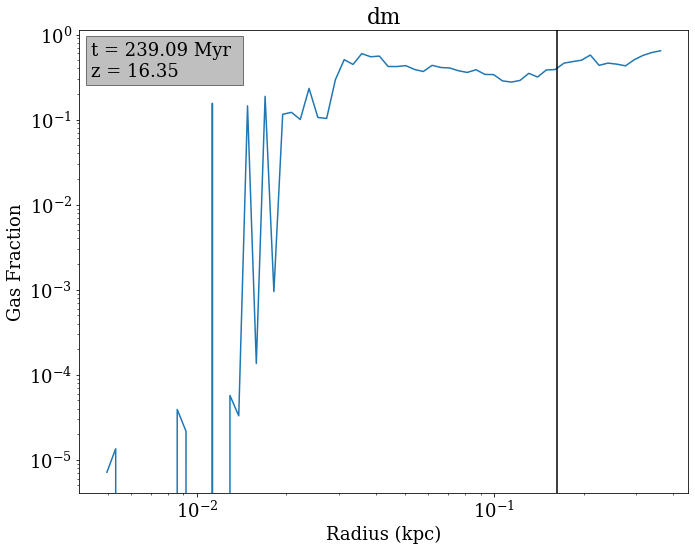

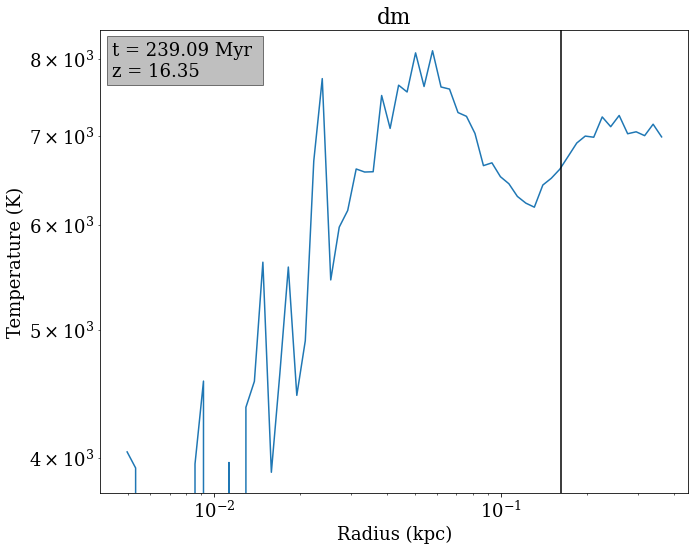

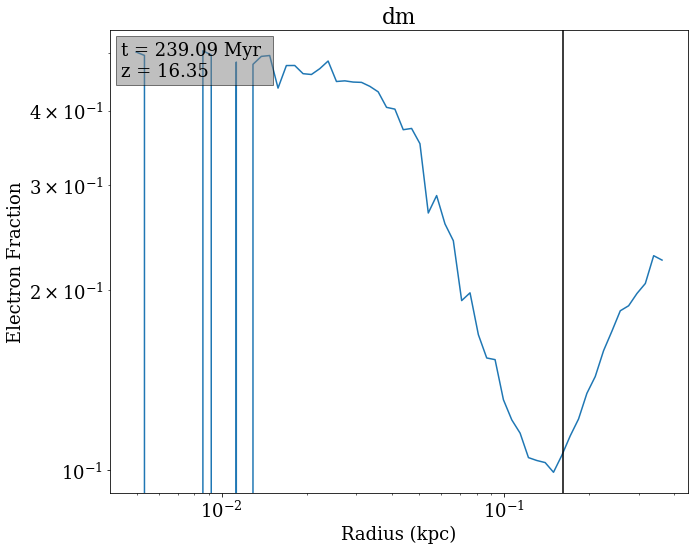

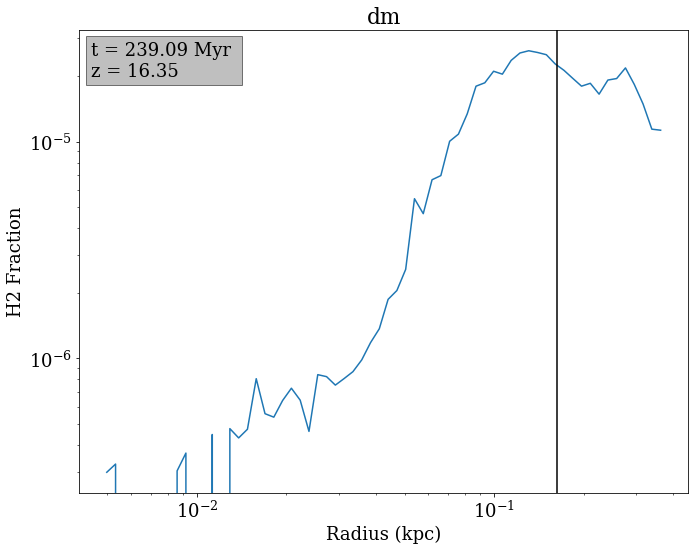

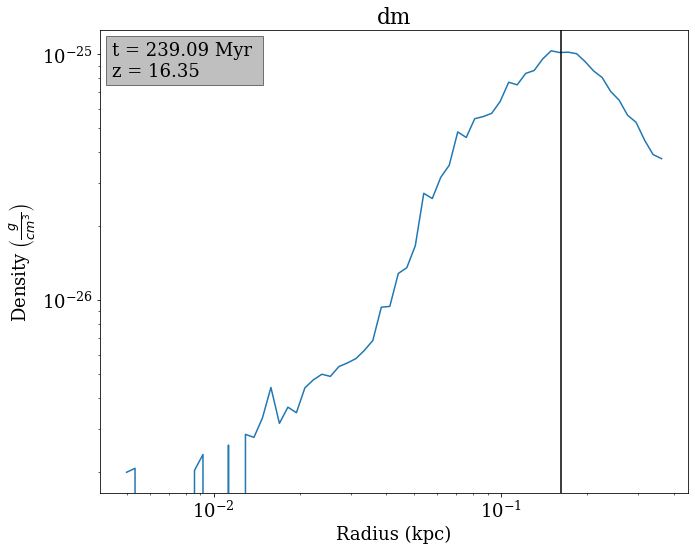

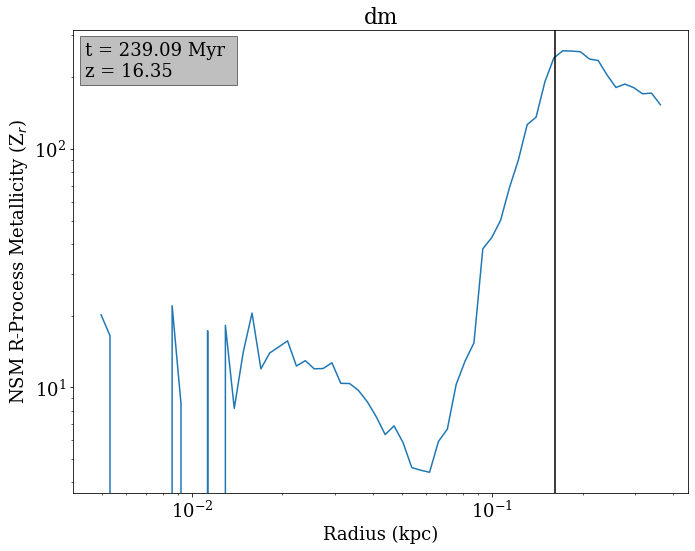

In [205]:
make_profile(run_name, o, profile_fields, chosen_star = chosen_star, halo_pos = halo_pos)

In [1]:
####
proj_fields = [("gas", "density"),
          ('gas', 'temperature'),
          ('gas', 'metallicity'),
          ('gas', 'metallicity3'),
          ('gas', 'metallicity4')]

phase_fields = [[("gas", "density"), ("gas", "temperature"), ("gas", "cell_mass")],
                [("gas", "density"), ("gas", "temperature"), ('gas', 'metallicity3')],
                [('index', 'radius'), ('gas', 'metallicity3'), ("gas", "cell_mass")],
                [("gas", "metallicity3"), ("gas", "metallicity4"), ("gas", "cell_mass")], 
                [("gas", "density"), ("gas", "temperature"), ("gas", "metallicity4")], 
                [('index', 'radius'), ('gas', 'metallicity4'), ("gas", "cell_mass")]]

profile_fields = [('gas', 'metallicity'),
                  ('gas', 'metallicity3'),
                  ('gas', 'gas_fraction'),
                  ('gas', 'temperature'),
                  ('gas', 'electron_fraction'),
                  ('gas', 'H2_fraction'),
                  ('gas', 'density'),
                  ("gas", "metallicity4"),
                  ('enzo', 'NSMRProcess')]

profile_fields = [('gas', 'metallicity'),
                  ('gas', 'metallicity3'),
                  ('gas', 'gas_fraction'),
                  ('gas', 'temperature'),
                  ('gas', 'electron_fraction'),
                  ('gas', 'H2_fraction'),
                  ('gas', 'density'),
                  ("gas", "metallicity4"),
                  ('enzo', 'NSMRProcess')]

units = {("gas", "density"):'g/cm**3', 
         ("gas", "temperature"):'K', 
         ("gas", "cell_mass"):'g', 
         ('gas', 'metallicity'):'Zsun',
         ("gas", "metallicity3"):'Zsun', 
         ("gas", "metallicity4"):"Zr",
         ('gas', 'gas_fraction'):"dimensionless",
         ('gas', 'electron_fraction'):"dimensionless",
         ('gas', 'H2_fraction'):"dimensionless",
         ('gas', 'J21_LW'):"dimensionless", 
         ('gas', 'J_Lyman'):"erg/cm**2",
         ('index', 'radius'):"pc"
        }

field_labels = {"density":r'Density $\left( \frac{g}{cm^{3}} \right)$', 
         "temperature":'Temperature (K)', 
         "cell_mass":'Mass [g]', 
         "metallicity3":r'Pop III Metallicity (Z$_{\odot}$)', 
         "metallicity4":r"NSM R-Process Metallicity (Z$_{r}$)",
         "metallicity":r"Pop II Metallicity (Z$_{\odot}$)",
        'gas_fraction':"Gas Fraction",
         'electron_fraction':"Electron Fraction",
         'H2_fraction':"H2 Fraction",
         'J21_LW':r"J$_{21}$", 
         'J_Lyman':r"J(Lyman) $\left( \frac{erg}{cm^{2}} \right)$",
        'radius':"r (pc)"
        }

colorbars = {"density":'viridis', 
         "temperature":'inferno', 
         "metallicity3":'magma', 
         "metallicity4":'magma',
         "metallicity":'magma'
        }

starcolors = {'p2':'black', 'p3':'red', 'chosen_stars':'white'}

## Projection limits
zlim = {}
zlim["density"] = (1e-27, 1e-22)
zlim["temperature"] = (1e2, 1e4)
zlim["metallicity"] = (1e-8, 1e-3)
zlim["metallicity3"] = (1e-10, 1e-2)
zlim["metallicity4"] = (1e-3, 1e3)

## Phase plot limits
zlim_phase = {}
zlim_phase["metallicity3"] = (1e-4, 1e-1)
zlim_phase["metallicity4"] = (1e-6, 10)
zlim_phase["cell_mass"] = (1e32, 1e37)

xlim_phase = {}
xlim_phase["density"] = (1e-28, 1e-20)
xlim_phase["metallicity3"] = (1e-10, 1e-1)
xlim_phase['radius'] = (1, 1e3)

ylim_phase = {}
ylim_phase["temperature"] = (10, 1e6)
ylim_phase["metallicity4"] = (1e-10, 1e4)
ylim_phase["metallicity3"] = (1e-10, 1e-1)

## Profile plot limits
xlim_profile = (1e-3, 1)

ylim_profile = {}
ylim_profile["metallicity4"] = (1e-2, 1e3)
ylim_profile['metallicity'] = (1e-6, 1e-2)
ylim_profile['metallicity3'] = (1e-4, 5e1)
ylim_profile['gas_fraction'] = (1e-3, 1)
ylim_profile['temperature'] = (1e2, 1e5)
ylim_profile['electron_fraction'] = (1e-2, 1)
ylim_profile['H2_fraction'] = (1e-7, 1e-2)
ylim_profile['density'] = (1e-26, 1e-20)

In [3]:
## Test data set
run_name = 'run_original'
o = '0023'
ds = yt.load(f'../{run_name}/DD{o}/output_{o}')

halo_pos, halo_rvir, halo_mass = func.get_halo_nods(run_name, o)

chosen_star = func.param_info[run_name]['id']
chosen_star_living = func.star_info[run_name][o]['chosen_stars'][chosen_star]['particle_position']
if chosen_star_living == -1:
    chosen_star = -1

time = func.DD_data[run_name][o]['time']
redshift = func.DD_data[run_name][o]['redshift']

yt : [INFO     ] 2023-02-02 16:50:14,034 Parameters: current_time              = 20.990809670788
yt : [INFO     ] 2023-02-02 16:50:14,035 Parameters: domain_dimensions         = [64 64 64]
yt : [INFO     ] 2023-02-02 16:50:14,035 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2023-02-02 16:50:14,036 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2023-02-02 16:50:14,036 Parameters: cosmological_simulation   = 1
yt : [INFO     ] 2023-02-02 16:50:14,036 Parameters: current_redshift          = 27.700630934434
yt : [INFO     ] 2023-02-02 16:50:14,037 Parameters: omega_lambda              = 0.6889
yt : [INFO     ] 2023-02-02 16:50:14,037 Parameters: omega_matter              = 0.3111
yt : [INFO     ] 2023-02-02 16:50:14,037 Parameters: omega_radiation           = 0
yt : [INFO     ] 2023-02-02 16:50:14,037 Parameters: hubble_constant           = 0.6766


In [11]:
chosen_star

-1

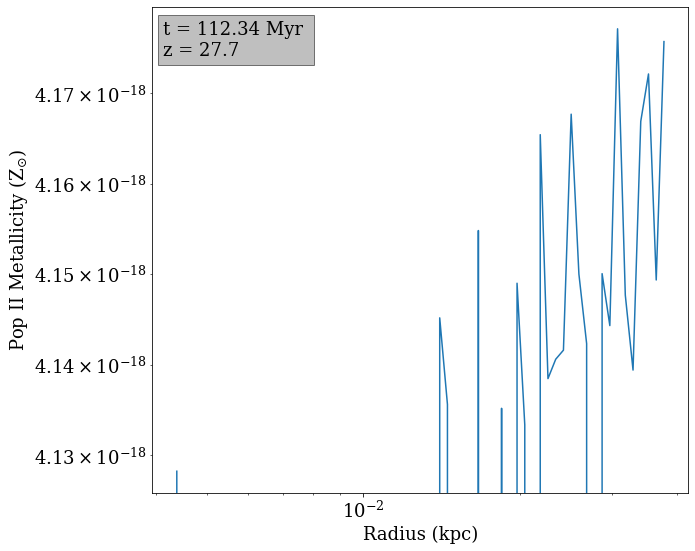

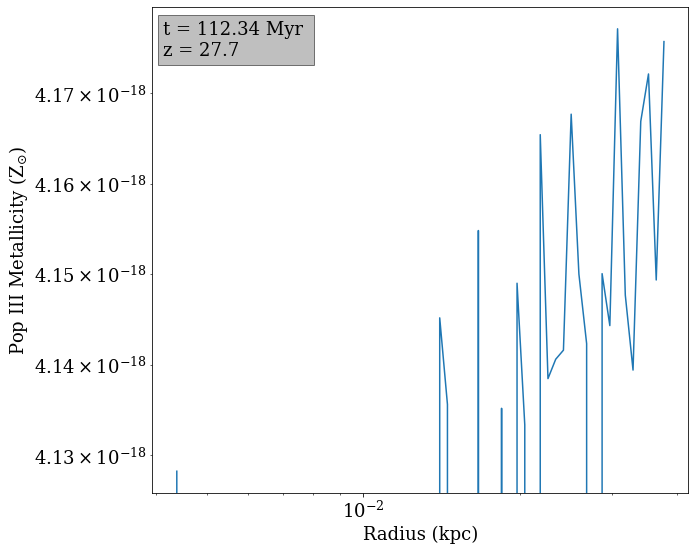

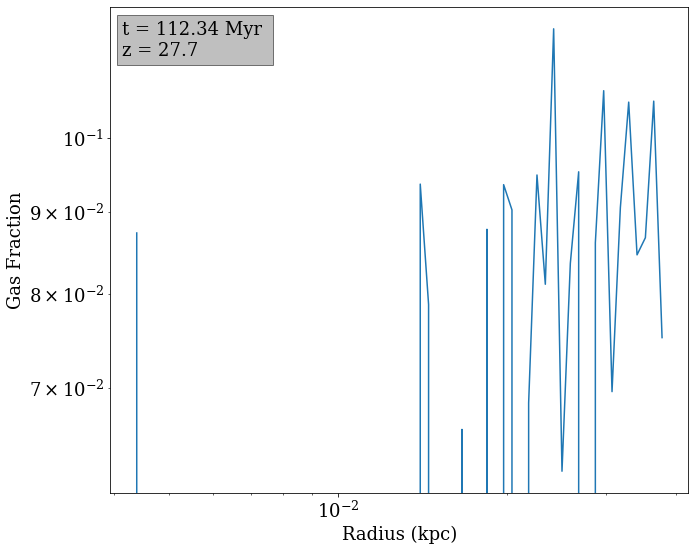

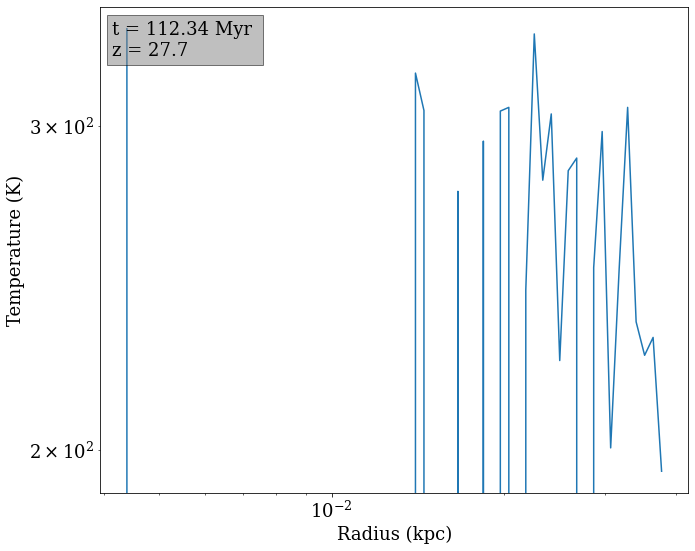

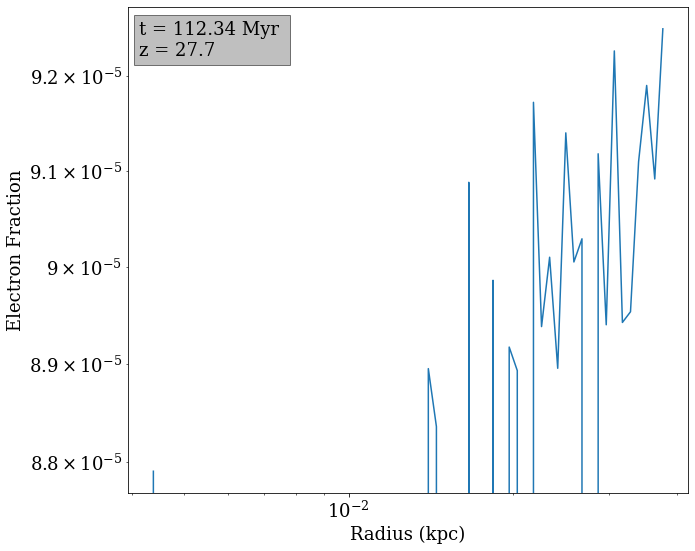

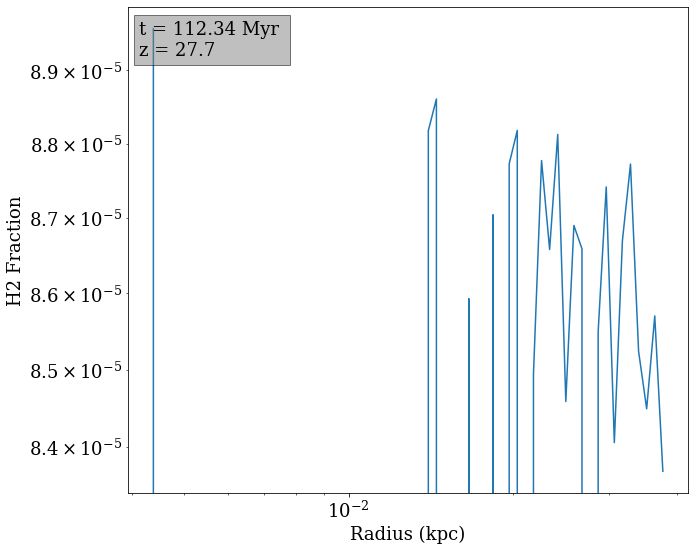

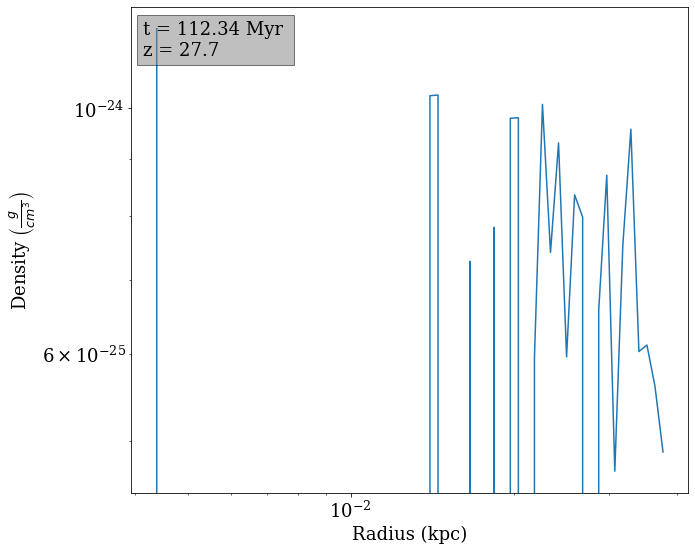

In [13]:
func.make_profile(run_name, o, time, redshift, profile_fields, field_labels, xlim=xlim_profile, ylim=ylim_profile, chosen_star = chosen_star, halo_pos = halo_pos)

In [1]:
import load_ins as load
import functions as func

In [15]:
load.stars

['p3_living', 'p3_binary', 'ns_binary', 'bh', 'p2', 'dm']

In [16]:
import load_ins as load

In [22]:
import os
limits = True
if limits == True:
    out_dir = "limits"
else:
    out_dir = "no_limits"
    
dataset_list = []
for i, run_name in enumerate(load.runs):
    if run_name == 'run_original':
        for j, o in enumerate(load.massive_prog):
            path = f'{load.image_outputs}{run_name}/{out_dir}/projection_gas_fraction_x_{o}.png'
            if os.path.isfile(path) != True:
                dataset_list.append(f'{load.run_dir}{run_name}/DD{o}/output_{o}')
                
    else:
        for j, o in enumerate(load.run_halos[run_name]):
            path = f'{load.image_outputs}{run_name}/{out_dir}/projection_gas_fraction_x_{o}.png'
            if os.path.isfile(path) != True:
                dataset_list.append(f'../{run_name}/DD{o}/output_{o}')

In [5]:
func.make_projections(run_name, o, halo_rvir, halo_pos, time, redshift, load.proj_fields, load.field_labels, load.zlim, load.colorbars, load.starcolors, set_limits = load.set_limits)

images/run_original/no_limits/projection_density_0023.png has been created.
images/run_original/no_limits/projection_temperature_0023.png has been created.
images/run_original/no_limits/projection_metallicity_0023.png has been created.
images/run_original/no_limits/projection_metallicity3_0023.png has been created.
